In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(r"train.csv")
data.head(2)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied


In [26]:
data.iloc[:,-1].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data["satisfaction"] = le.fit_transform(data["satisfaction"])
data["Customer Type"] = le.fit_transform(data["Customer Type"])
data["Class"] = data["Class"].map({ "Eco":1,"Eco Plus":2,"Business":3})


"""data["JobType"] = data["JobType"].map({" ?":np.nan, " Never-worked":0,
                                       " Without-pay":1," Self-emp-not-inc":2,
                                       " Self-emp-inc":3," Private":4,
                                         "Local-gov":5," State-gov":6," Federal-gov":7," Without-pay":8})"""

Y = data.iloc[:,-1]
X = data[["Class", "Online boarding","Inflight entertainment"]]

from sklearn.impute import SimpleImputer
imputer  = SimpleImputer(missing_values = np.nan, strategy = "mean")
missing_data = X.values
missing_data = missing_data.reshape(len(missing_data),X.shape[1])
imputer = imputer.fit(missing_data)
X = imputer.transform(missing_data)
X1 = pd.DataFrame(X, columns = ["Class", "Online boarding","Inflight entertainment"])




from sklearn.model_selection import train_test_split


x_train, x_test,y_train,y_test = train_test_split(X1,Y,test_size=0.33, random_state=0)

x_train = x_train.sort_index().values
y_train = y_train.sort_index().values
x_test = x_test.sort_index().values
y_test = y_test.sort_index().values


from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import VotingClassifier

from sklearn.pipeline import make_pipeline

In [29]:
from functools import reduce

def _get_model_name(model):
    """
            Returns a string with the name of a sklearn model
                model: Sklearn stimator class
    """
    if isinstance(model, Pipeline):
        estimator = model.steps[-1][1]
        name = "Pipeline_" + str(estimator)[:str(estimator).find("(")]
    else: 
        name = str(model)[:str(model).find("(")]
    return name
    
    
def plot_cv_score(X, y, models_list, cv = 5, scoring_list = None, refit = True, return_scores = False):
    """ 
            X: numpy_array/pandas dataframe n_rows, m_features
            y: numpy_array/pandas dataframe n_rows
            Plots min, max and avg kfold crosval_score for a list of models
        
    """
    
        
        
    names, mean_score = list(), list()
    ldf = list()
    mnames = list()
    
    for i, model in enumerate(models_list):
        name = _get_model_name(model)
    
        if refit:
            model.fit(X, y)
                
        for metric in score_list:
            
            score = cross_val_score(model, X, y, cv = cv, scoring = metric, n_jobs= -1)
            mean_score.append(np.mean(score))
    
    
        tmp = pd.DataFrame({name: mean_score}, index = score_list)
        
            
            
        ldf.append(tmp)
        
        
        mean_score = list()
        
    frame_scores = reduce(lambda x,y: pd.merge(x,y, left_index = True, right_index = True), ldf).T
        
    
    
    fig, ax  = plt.subplots(1,1, figsize = (10,5))

    frame_scores.plot.bar(ax = ax, cmap = 'RdYlBu', edgecolor = "black")
    ax.legend(loc = 'best')
    ax.set_xlabel("Score")
    ax.set_title("Cross validation model benchmark")

    if return_scores:    
        return frame_scores

Accuracy:  (0.8434389140271493, 'Ensemble')
Precision:  (0.8693394733298495, 'Ensemble')
Recall:  (0.7515666569252204, 'Ensemble')
F1 score:  (0.8061622319361853, 'Ensemble')


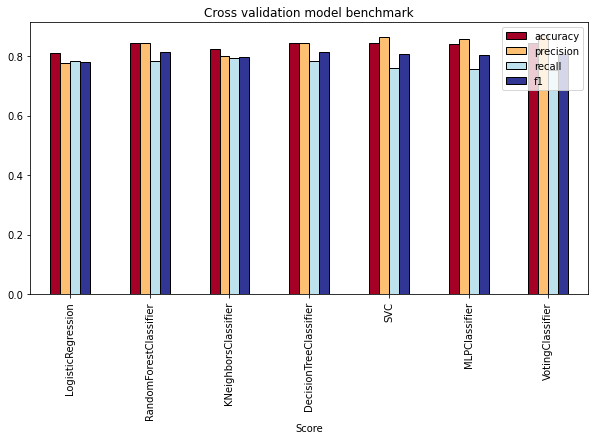

In [35]:

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import VotingClassifier

from sklearn.pipeline import make_pipeline

"""
from sklearn.ensemble import StackingClassifier
"""

clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=10)
clf1 = LogisticRegression(random_state=10)
clf2 = RandomForestClassifier(n_estimators=50, random_state=10)
clf3 = KNeighborsClassifier()
clf4 = DecisionTreeClassifier()
clf5 = SVC()
eclf = VotingClassifier(estimators=[("lr",clf1),('rf', clf2),("knn", clf3),("dt",clf4), ('svc', clf5), ("mlp",clf)],
                        
                        voting='hard')

"""for clf, label in zip([clf1,clf2, clf3,clf4, clf5, clf, eclf], ["Logistic Regression",'Random Forest', "KNeighborsClassifier",
                                                                'Decision Tree', "Support Vector Machine","MLP_neuralNetwork", 'Ensemble']):
    scores = cross_val_score(clf, x_train, y_train, scoring='accuracy', cv=3)
    print("Accuracy: ", (scores.mean(), label))
    scores = cross_val_score(clf, x_train, y_train, scoring='precision', cv=3)
    print("Precision: ",  (scores.mean(), label))
    scores = cross_val_score(clf, x_train, y_train, scoring='recall', cv=3)
    print("Recall: ", (scores.mean(), label))
    scores = cross_val_score(clf, x_train, y_train, scoring='f1', cv=3)
    print("F1 score: ",(scores.mean(), label))
    print("-------------------------")"""


scores = cross_val_score(eclf, x_train, y_train, scoring='accuracy', cv=3)
print("Accuracy: ", (scores.mean(), label))
scores = cross_val_score(eclf, x_train, y_train, scoring='precision', cv=3)
print("Precision: ",  (scores.mean(), label))
scores = cross_val_score(eclf, x_train, y_train, scoring='recall', cv=3)
print("Recall: ", (scores.mean(), label))
scores = cross_val_score(eclf, x_train, y_train, scoring='f1', cv=3)
print("F1 score: ",(scores.mean(), label))


models_list =[LogisticRegression(random_state=10),
              RandomForestClassifier(n_estimators=50, random_state=10),
              KNeighborsClassifier(),
              DecisionTreeClassifier(),
              SVC(),
              MLPClassifier(solver='adam', alpha=0.1, hidden_layer_sizes=(5, 2), random_state=10),
              VotingClassifier(estimators=[("lr",LogisticRegression(random_state=10)),
                                           ('rf',RandomForestClassifier(n_estimators=50, random_state=10)),
                                           ("knn",KNeighborsClassifier()),
                                           ("dt", DecisionTreeClassifier()),
                                           ("svc", SVC()),
                                     
                                           ("mlp",MLPClassifier(solver='adam', alpha=0.1,hidden_layer_sizes=(5, 2), random_state=10))], voting='hard')]     
                
score_list = ["accuracy", "precision", "recall", "f1"]

t = plot_cv_score(X = x_train, y = y_train, models_list = models_list, cv = 3, scoring_list = score_list)